# Challenge 2 - Visualization of Energy Consumptions

In [1]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.cluster import KMeans
% matplotlib inline

## 1. Download the data-set total-watt.csv

In [2]:
# Set index_col for the following task
total_watt = pd.read_csv("data/total_watt.csv",
                        parse_dates=['Timestamp'],
                        names=['Timestamp','Energy'],
                        index_col='Timestamp')
total_watt.head()

,Energy
Timestamp,
2011-04-18 13:22:00,925.840614
2011-04-18 13:52:00,483.295892
2011-04-18 14:22:00,915.761634
2011-04-18 14:52:00,609.043491
2011-04-18 15:22:00,745.155434


In [3]:
total_watt.tail()

,Energy
Timestamp,
2011-05-24 16:52:00,322.964905
2011-05-24 17:22:00,217.107327
2011-05-24 17:52:00,151.318154
2011-05-24 18:22:00,366.771885
2011-05-24 19:52:00,516.807876


## 3.Visualise the data-set
I show the data per week for a better understanding.

In [4]:
# check graph's y-size
print(total_watt.max())
print(total_watt.min())

Energy    9107.92262
dtype: float64
Energy    55.535874
dtype: float64


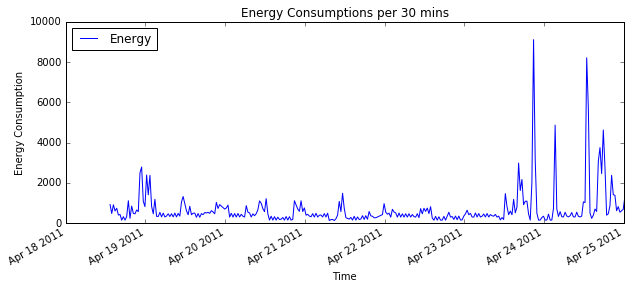

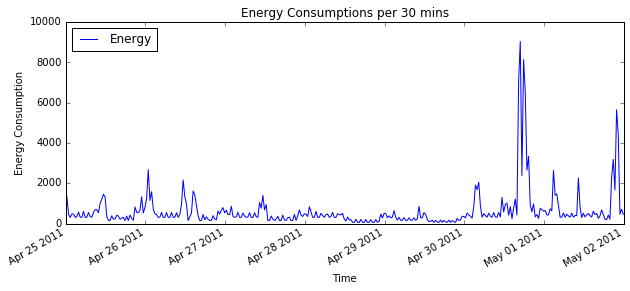

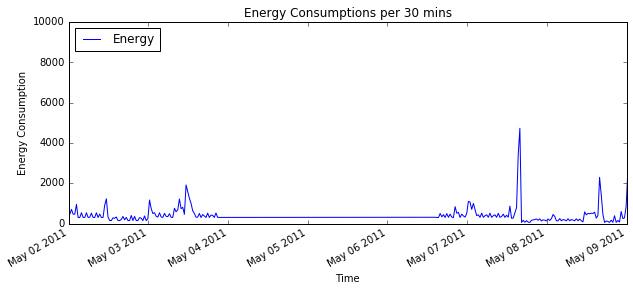

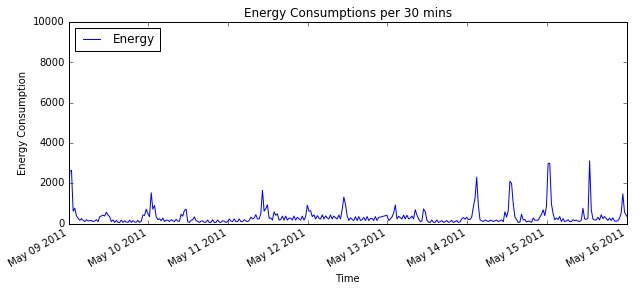

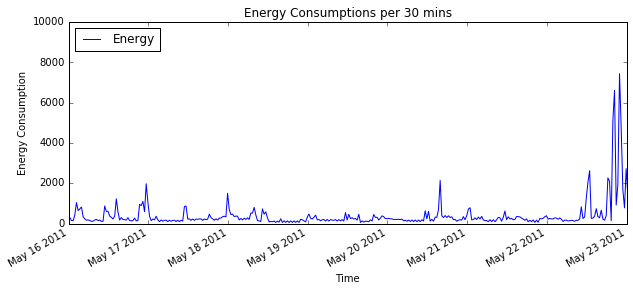

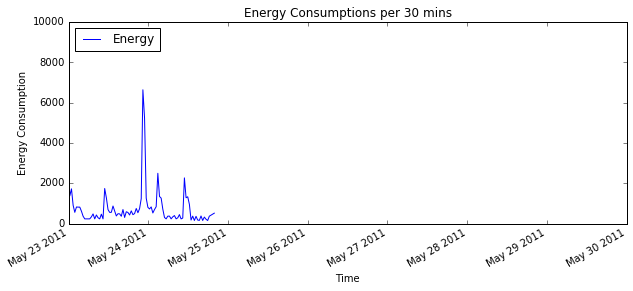

In [5]:
y_min = 0
y_max = 10000

# plot graphs per week
total_watt.plot(figsize=(10, 4))
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.axis(["2011-04-18 00:00:00", "2011-04-25 00:00:00" , y_min, y_max])
plt.legend( loc='upper left')
plt.title('Energy Consumptions per 30 mins')

total_watt.plot(figsize=(10, 4))
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.axis(["2011-04-25 00:00:00", "2011-05-02 00:00:00" , y_min, y_max])
plt.legend( loc='upper left')
plt.title('Energy Consumptions per 30 mins')

total_watt.plot(figsize=(10, 4))
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.axis(["2011-05-02 00:00:00", "2011-05-09 00:00:00" , y_min, y_max])
plt.legend( loc='upper left')
plt.title('Energy Consumptions per 30 mins')

total_watt.plot(figsize=(10, 4))
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.axis(["2011-05-09 00:00:00", "2011-05-16 00:00:00" , y_min, y_max])
plt.legend( loc='upper left')
plt.title('Energy Consumptions per 30 mins')

total_watt.plot(figsize=(10, 4))
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.axis(["2011-05-16 00:00:00", "2011-05-23 00:00:00" , y_min, y_max])
plt.legend( loc='upper left')
plt.title('Energy Consumptions per 30 mins')

total_watt.plot(figsize=(10, 4))
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.axis(["2011-05-23 00:00:00", "2011-05-30 00:00:00" , y_min, y_max])
plt.legend( loc='upper left')
plt.title('Energy Consumptions per 30 mins')

plt.show()

It's easy to find that the energy consumptions raise in the weekend.

## 4.Visualise the data-set as values per day
I separated the energy per day by 8 hours to show how the amount of energy varied in accordance with the time of day.  
I also shaded  the weekend because those value tended to be high.

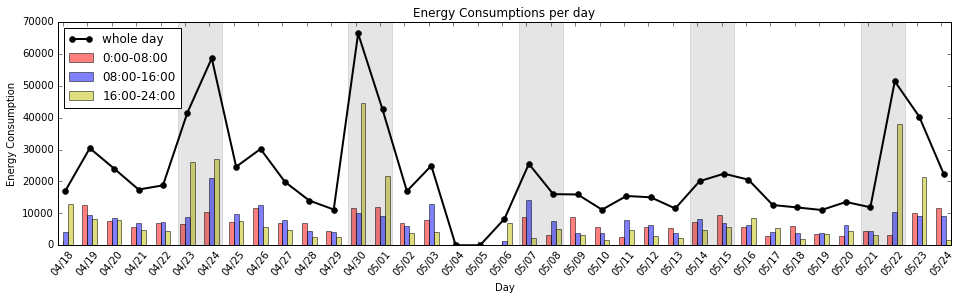

In [9]:
date_range = pd.date_range('2011-04-18', '2011-05-24')
different_sums_of_energy = np.zeros([4, len(date_range)])
for i, one_date in enumerate(date_range):
    one_date = one_date.strftime('%Y-%m-%d')
    different_sums_of_energy[0,i] = total_watt[one_date:one_date+' 08:00:00'].sum()
    different_sums_of_energy[1,i] = total_watt[one_date+' 08:00:00':one_date+' 16:00:00'].sum()
    different_sums_of_energy[2,i] = total_watt[one_date+' 16:00:00':one_date].sum()
    different_sums_of_energy[3,i] = total_watt[one_date].sum()

plt.figure(figsize=(16, 4))    
ind = np.arange(len(date_range))
plt.bar(ind, (different_sums_of_energy[0]), 0.2, color="r", alpha=0.5, align="center", label="0:00-08:00")
plt.bar(ind+0.2, (different_sums_of_energy[1]), 0.2, color="b", alpha=0.5, align="center", label="08:00-16:00")
plt.bar(ind+0.4, (different_sums_of_energy[2]), 0.2, color="y", alpha=0.5, align="center", label="16:00-24:00")
plt.plot(ind+0.2, (different_sums_of_energy[3]), color='k', alpha=1.0, lw=2, label="whole day", marker="o")
plt.xlabel('Day')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumptions per day')
plt.xticks(ind+0.1, [dt.strftime(i, '%m/%d') for i in date_range], rotation=50)
plt.legend( loc='upper left')
plt.autoscale(enable=True, axis='x',tight=True)

plt.axvspan(4.8, 6.6, facecolor='k', alpha=0.1)
plt.axvspan(11.8, 13.6, facecolor='k', alpha=0.1)
plt.axvspan(18.8, 20.6, facecolor='k', alpha=0.1)
plt.axvspan(25.8, 27.6, facecolor='k', alpha=0.1)
plt.axvspan(32.8, 34.6, facecolor='k', alpha=0.1)

plt.show()

## 5.Cluster the values per day into 3 groups: low, medium, and high energy consumption
I apply K-means for clustering because the number of categories are known and samples are not so much.

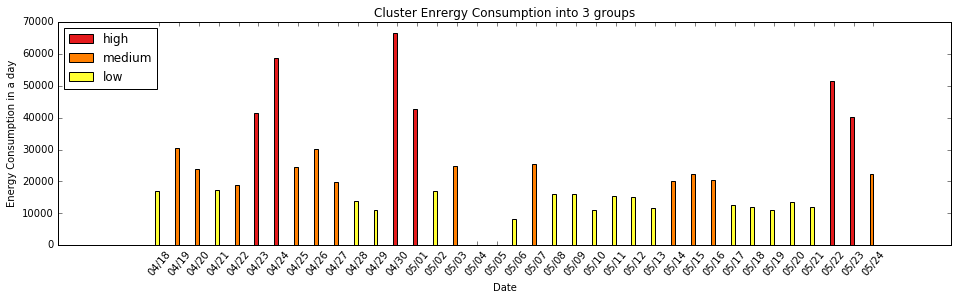

In [47]:
daily_consumption = different_sums_of_energy[3]
kmeans = KMeans(n_clusters=3)
kmeans.fit([[x] for x in daily_consumption])
labels = kmeans.labels_

high_color =  "#e41a1c"
medium_color = "#ff7f00"
low_color = "#ffff33"

# labels are variable for each run, so following are for fix its index and color
high_label = labels[daily_consumption.argmax()]
low_label = labels[daily_consumption.argmin()]
color_list = [medium_color]*3
color_list[high_label] = high_color
color_list[low_label] = low_color
color = [color_list[i] for i in labels]

plt.figure(figsize=(16, 4))    
ind = np.arange(len(date_range))
plt.bar(ind, (different_sums_of_energy[3]), 0.2, color=color, alpha=1.0, align="center")
plt.xticks(ind+0.1, [dt.strftime(i, '%m/%d') for i in date_range], rotation=50)
plt.xlabel('Date')
plt.ylabel('Energy Consumption in a day')
plt.title('Cluster Enrergy Consumption into 3 groups')

lg = []
lg.append(plt.Rectangle((0, 0), 1, 1, fc=high_color))
lg.append(plt.Rectangle((0, 0), 1, 1, fc=medium_color))
lg.append(plt.Rectangle((0, 0), 1, 1, fc=low_color))
plt.legend([lg[0],lg[1],lg[2]], ["high","medium","low"], loc=2)

plt.show()

## 6.Visualise the clusters
As the data are visualized per day for some period and we easily find that the energy consumptions raise in the weekend, it's natural to cluster them by day of the week.

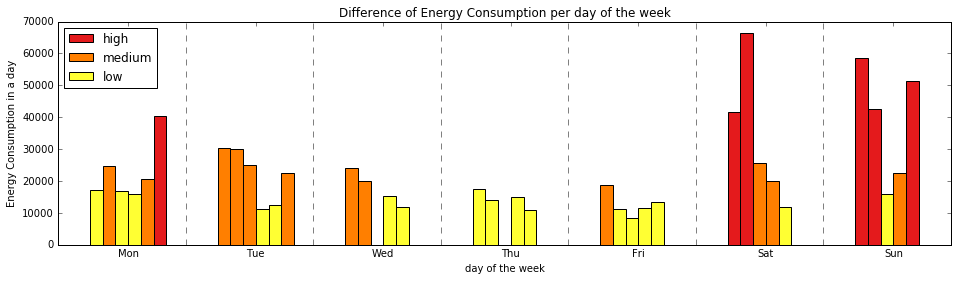

In [55]:
day_list = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.figure(figsize=(16, 4))   
for i, energy_per_day in enumerate(different_sums_of_energy[3]):
    # Plot bars by day of the week
    # Adjust the position by using quotient and remainder of index
    q = i // 7
    r = i % 7
    bar_color = color[i]
    plt.bar(0.6+q*0.2+r*2, energy_per_day, 0.2, color=bar_color, alpha=1.0, align="center")
 
plt.xlabel('day of the week')
plt.ylabel('Energy Consumption in a day')
plt.title('Difference of Energy Consumption per day of the week')
plt.xticks(np.arange(1.1,15, 2), day_list)
for x in range(2, 16, 2):
    plt.axvline(x=x, linestyle='--', color='grey')
plt.legend([lg[0],lg[1],lg[2]], ["high","medium","low"], loc=2)

plt.show()